In [1]:
!pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 279.3 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 391.3 kB/s eta 0:00:01
     -------------------- --------------- 153.6/275.7 kB 702.7 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0

In [3]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('fine_tuned_roberta1')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


In [4]:
def predict_fn(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    return logits

In [23]:
text_samples = ["the box is very simple....the charger is not a cube like apple."]


In [24]:
import pandas as pd
import numpy as np
import scipy as sp
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [25]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=["ChatGPT", "Human"])

explanations = []
for text in text_samples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=10)
    explanations.append(explanation)

In [26]:

import json

explanations_data = []
for explanation in explanations:
    explanations_data.append(explanation.as_list())


Explanation for Text Sample 1 - True Class: -1.8527497053146362
Text Sample 1: the box is very simple....the charger is not a cube like apple.
1. is: -1.0486044739377083
2. box: 0.6038629269717133
3. charger: 0.44230852869112536
4. simple: -0.33319512262634027
5. apple: -0.3305175066126639
6. like: 0.3206808343541717
7. a: -0.3161512489310086
8. cube: -0.1952886077872411
9. the: -0.1339612857349011
10. very: 0.060253607253767556


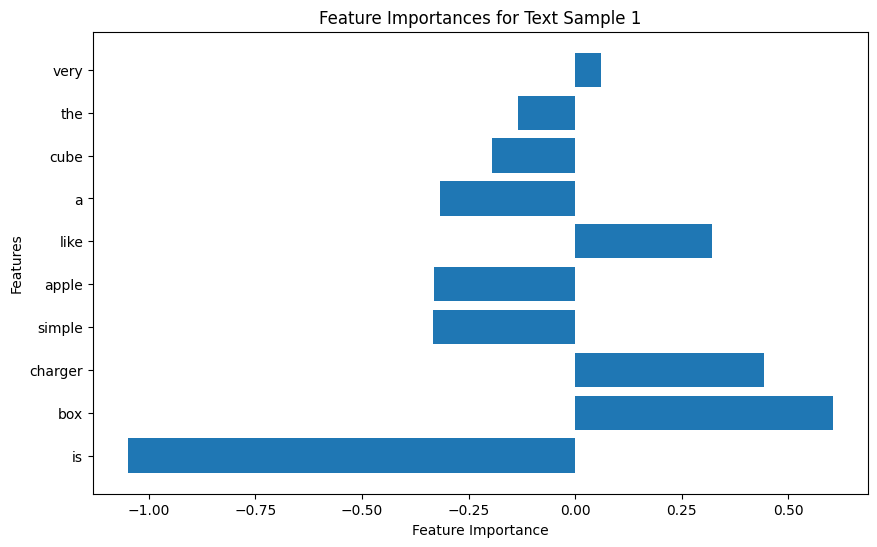

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of features to display
num_features = 10

# Iterate over explanations
for i, explanation in enumerate(explanations):
    print(f"Explanation for Text Sample {i + 1} - True Class: {explanation.predict_proba[1]}")

    # Get feature names and importances
    feature_names = explanation.as_list(label=1)  # Use label 1 for "Human" class
    feature_names = feature_names[:num_features]  # Slice to limit to num_features
    feature_names, feature_importances = zip(*feature_names)
    print(f"Text Sample {i + 1}: {text_samples[i]}")

    for j, feature_name in enumerate(feature_names):
        print(f"{j + 1}. {feature_name}: {feature_importances[j]}")
    # Create a horizontal bar chart to visualize feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(feature_names)), feature_importances, align='center')  # Use len(feature_names) as the number of features
    plt.yticks(np.arange(len(feature_names)), feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for Text Sample {i + 1}')
    plt.show()

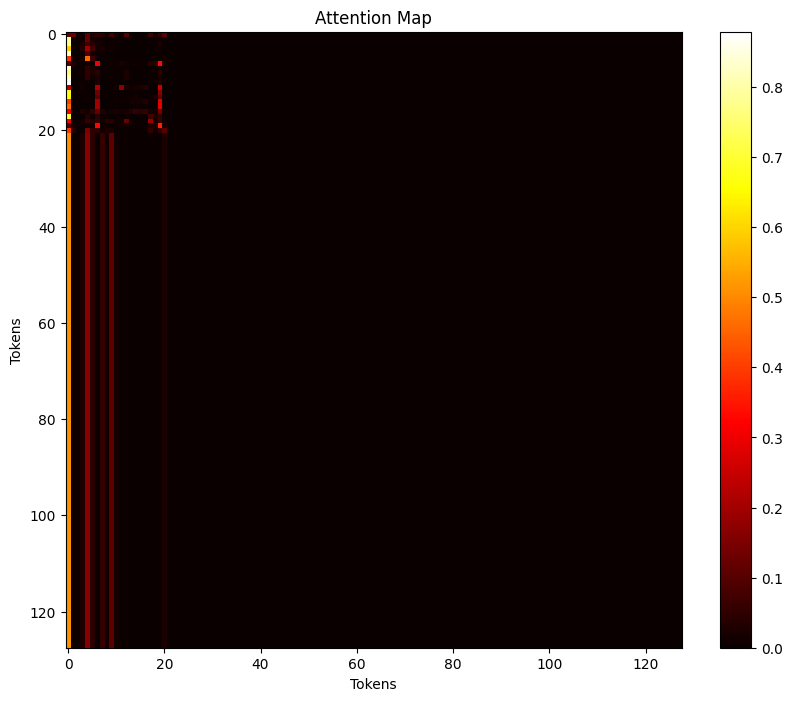

In [35]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import matplotlib.pyplot as plt

# Path to your fine-tuned RoBERTa model's tokenizer directory
model_path = 'fine_tuned_roberta1'  # Replace with the correct path to the tokenizer directory
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Define your input text
input_text = "Your input text goes here. This could be a sentence or a piece of text for analysis."

# Tokenize the input text
inputs = tokenizer.encode_plus(
    input_text,
    add_special_tokens=True,
    return_tensors='pt',
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=128  # Adjust this based on your model's input length
)

# Forward pass through the model
outputs = model(**inputs, output_attentions=True)  # Set output_attentions=True to retrieve attention weights

# Extract attention weights from the model
attentions = outputs.attentions

# Plot the attention weights if available
if attentions:
    plt.figure(figsize=(10, 8))
    plt.imshow(attentions[-1][0][0].detach().cpu().numpy(), cmap='hot', interpolation='nearest')
    plt.xlabel('Tokens')
    plt.ylabel('Tokens')
    plt.title('Attention Map')
    plt.colorbar()
    plt.show()
else:
    print("Attention weights not available.")


In [42]:
import pandas as pd
import json
import random
from lime.lime_text import LimeTextExplainer

# Load your labeled data from the CSV file
data = pd.read_csv('labeled-dataset.csv')

# Sample 200 random texts from the data
text_samples = data['text'].sample(n=1, random_state=42).tolist()

from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('fine_tuned_roberta1')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Replace this with your predict function for the fine-tuned RoBERTa model
def predict_fn(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    return logits

# LimeTextExplainer instance
explainer = LimeTextExplainer()

# Number of features to display
num_features = 10

# List to store text samples and their feature importances as dictionaries
data = []

# Iterate over text samples for explanations
for text in text_samples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=num_features)
    feature_dict = {}
    feature_dict['text'] = text

    # Get feature names and importances
    feature_names = explanation.as_list(label=1)  # Use label 1 for "Human" class
    feature_names = feature_names[:num_features]  # Limit to num_features
    feature_names, feature_importances = zip(*feature_names)

    # Store top features and their importances in a dictionary
    features_data = {}
    for j, feature_name in enumerate(feature_names):
        features_data[f"Feature {j + 1}"] = {
            "Name": feature_name,
            "Importance": feature_importances[j]
        }

    feature_dict['top_features'] = features_data
    data.append(feature_dict)

# Save the data to a JSON file
with open('text_samples_features.json', 'w') as outfile:
    json.dump(data, outfile, indent=4)

print("Data saved to text_samples_features.json")


Data saved to text_samples_features.json


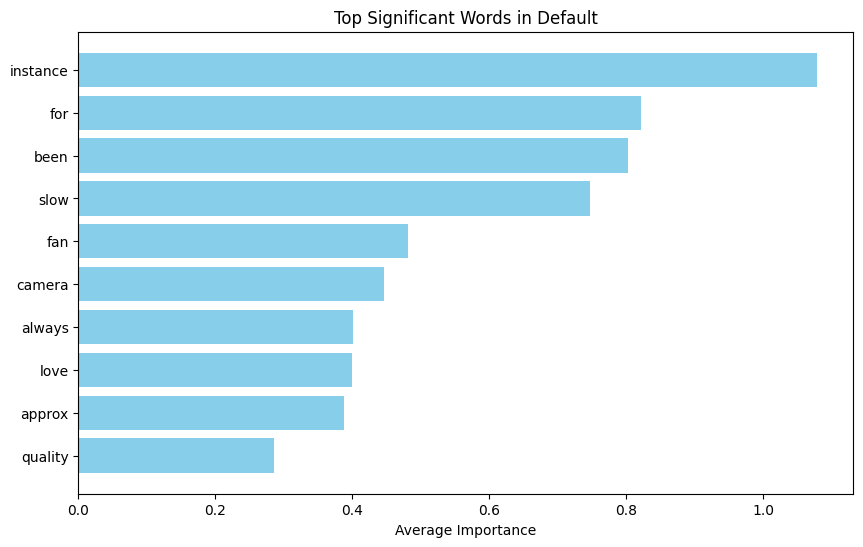

In [55]:
import json
import matplotlib.pyplot as plt

# Load your data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Dictionary to store word importance per context/topic
word_importance_per_context = {}

# Iterate over each text sample
for sample in data:
    text = sample['text']
    top_features = sample['top_features']

    # Extract context or topic information (adjust this based on your data)
    context = "Default"  # Replace this with the actual context or topic information

    # Update word importance for the current context
    if context not in word_importance_per_context:
        word_importance_per_context[context] = {}

    for feature_name, feature_info in top_features.items():
        word = feature_info['Name']
        importance = feature_info['Importance']

        if word not in word_importance_per_context[context]:
            word_importance_per_context[context][word] = []

        word_importance_per_context[context][word].append(importance)

# Calculate average importance per word for each context
average_word_importance_per_context = {}
for context, word_importance in word_importance_per_context.items():
    average_word_importance = {}
    for word, importance_list in word_importance.items():
        average_importance = sum(importance_list) / len(importance_list)
        average_word_importance[word] = average_importance
    average_word_importance_per_context[context] = average_word_importance

# Plot top significant words for each context
for context, word_importance in average_word_importance_per_context.items():
    sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:10])  # Select top 10 significant words per context

    plt.figure(figsize=(10, 6))
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Average Importance')
    plt.title(f'Top Significant Words in {context}')
    plt.gca().invert_yaxis()
    plt.show()


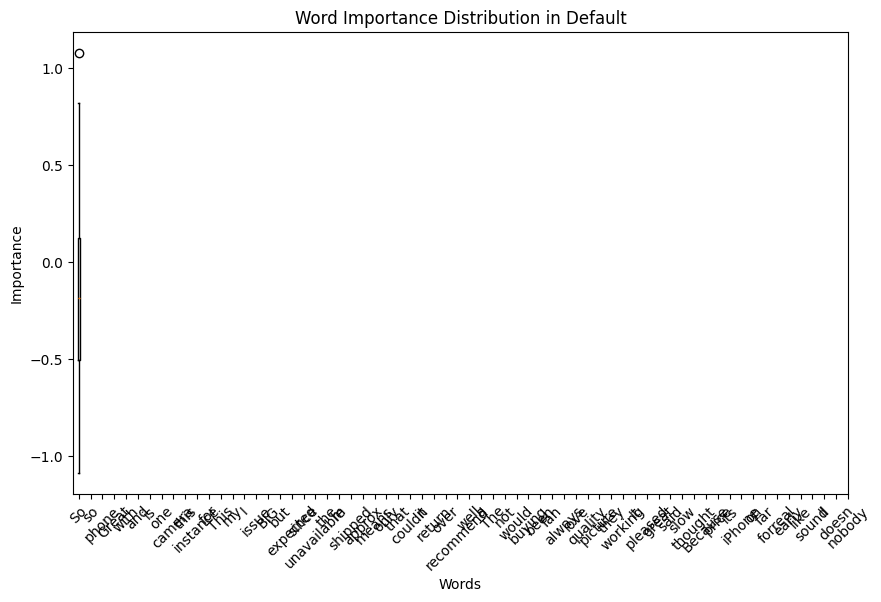

In [57]:
for context, word_importance in average_word_importance_per_context.items():
    plt.figure(figsize=(10, 6))
    plt.boxplot(word_importance.values())
    plt.xticks(range(1, len(word_importance) + 1), word_importance.keys(), rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Importance')
    plt.title(f'Word Importance Distribution in {context}')
    plt.show()


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

for context, word_importance in average_word_importance_per_context.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {context}')
    plt.show()


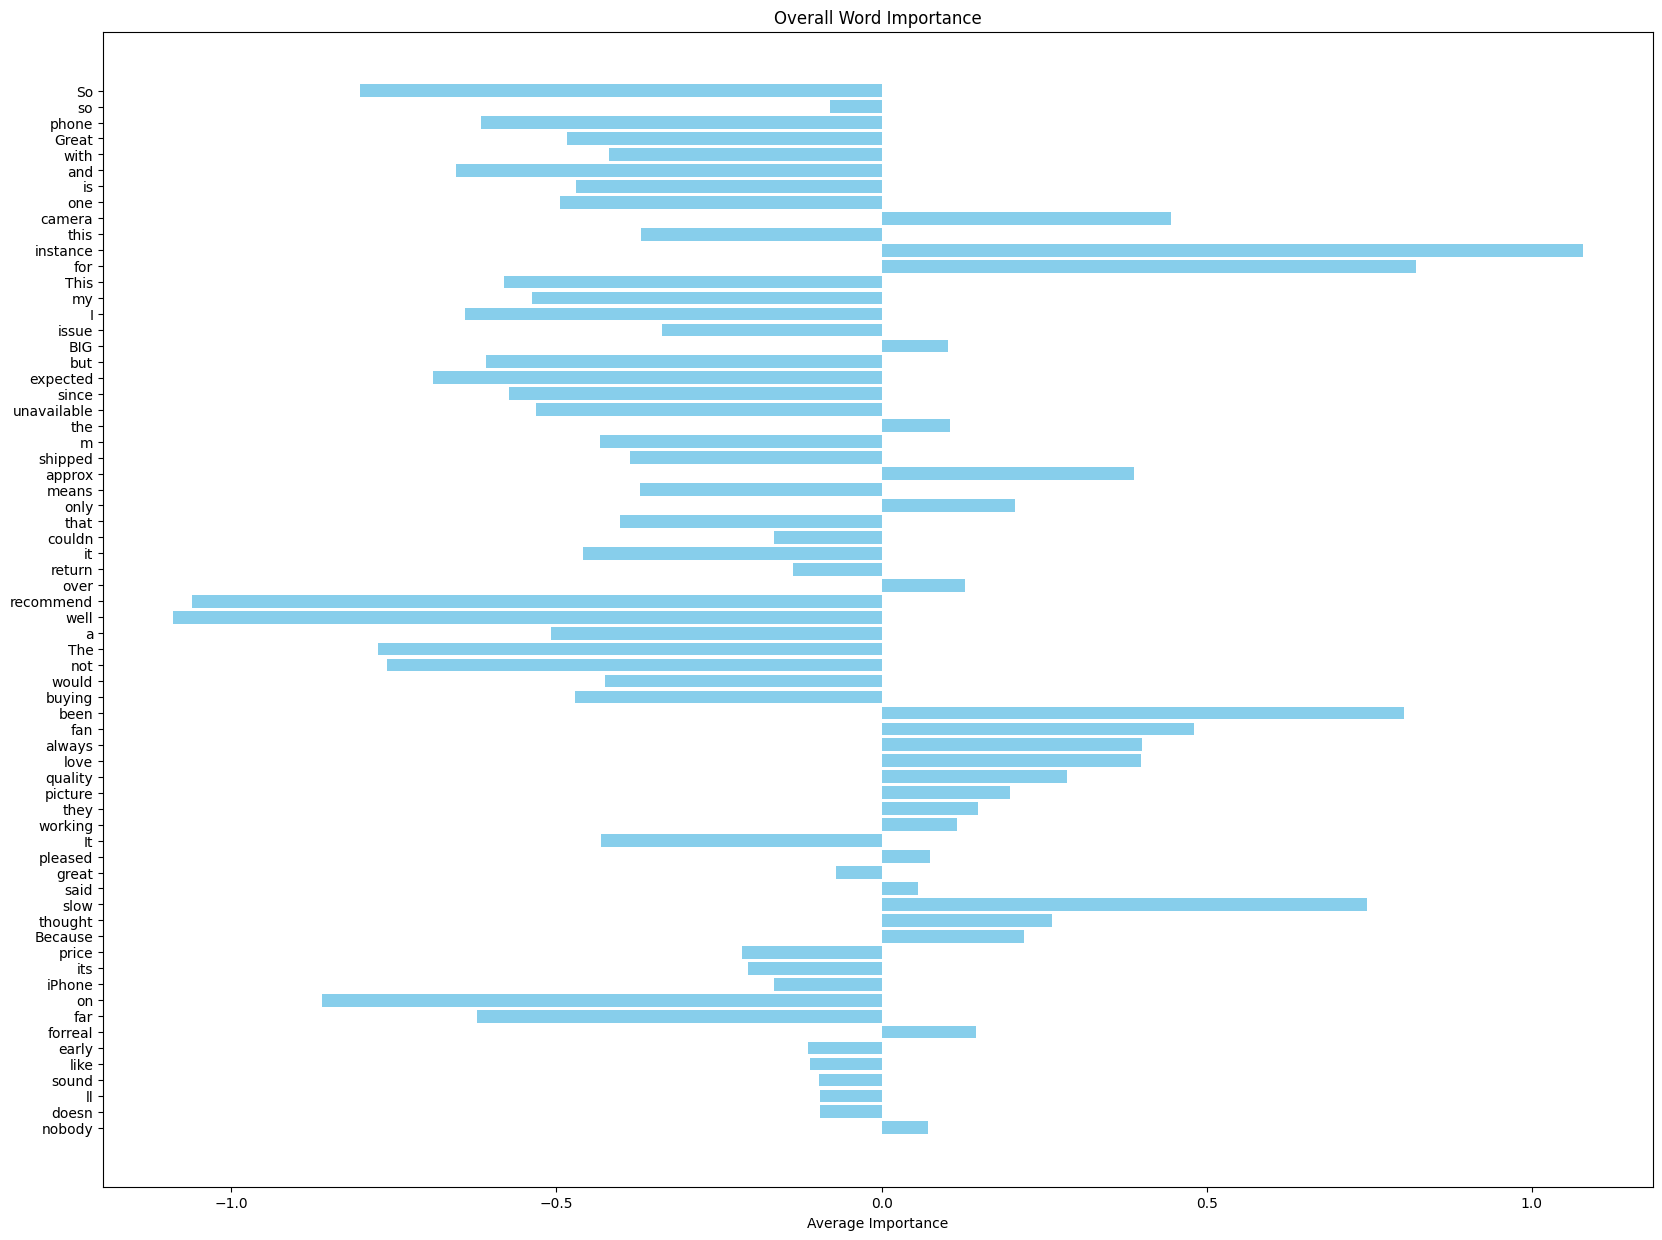

In [69]:
overall_word_importance = {}
for context, word_importance in average_word_importance_per_context.items():
    for word, importance in word_importance.items():
        if word not in overall_word_importance:
            overall_word_importance[word] = []
        overall_word_importance[word].append(importance)

overall_average_word_importance = {word: sum(importance_list) / len(importance_list) for word, importance_list in overall_word_importance.items()}

plt.figure(figsize=(20,15))
plt.barh(list(overall_average_word_importance.keys()), list(overall_average_word_importance.values()), color='skyblue')
plt.xlabel('Average Importance')
plt.title('Overall Word Importance')
plt.gca().invert_yaxis()
plt.show()


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 544.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 944.1 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.4 MB/s eta 0:00:00


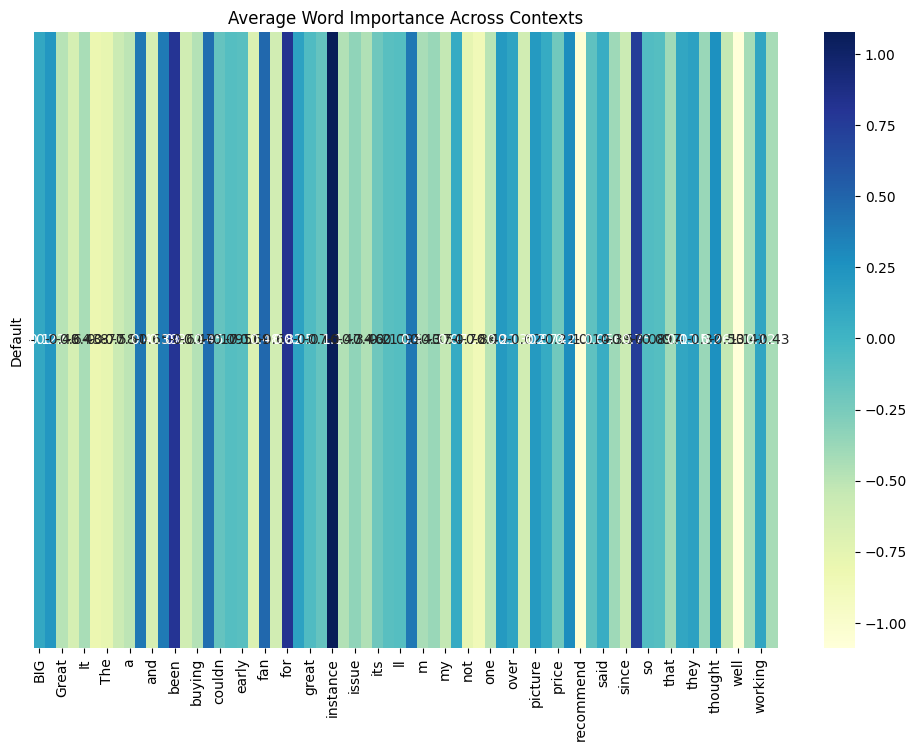

In [63]:
!pip install seaborn
import seaborn as sns

word_importance_df = pd.DataFrame(average_word_importance_per_context)
plt.figure(figsize=(12, 8))
sns.heatmap(word_importance_df.T, cmap='YlGnBu', annot=True)
plt.title('Average Word Importance Across Contexts')
plt.show()


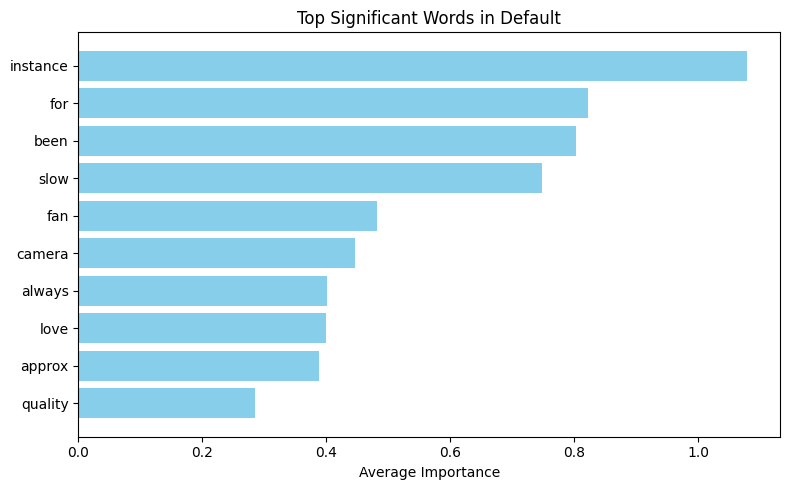

In [64]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Dictionary to store word importance per context/topic
word_importance_per_context = {}

# Iterate over each text sample
for sample in data[:10]:  # Adjust the sample size for quicker visualization
    text = sample['text']
    top_features = sample['top_features']
    context = "Default"  # Replace this with the actual context or topic information

    # Update word importance for the current context
    if context not in word_importance_per_context:
        word_importance_per_context[context] = {}

    for feature_name, feature_info in top_features.items():
        word = feature_info['Name']
        importance = feature_info['Importance']

        if word not in word_importance_per_context[context]:
            word_importance_per_context[context][word] = []

        word_importance_per_context[context][word].append(importance)

# Calculate average importance per word for each context
average_word_importance_per_context = {}
for context, word_importance in word_importance_per_context.items():
    average_word_importance = {}
    for word, importance_list in word_importance.items():
        average_importance = sum(importance_list) / len(importance_list)
        average_word_importance[word] = average_importance
    average_word_importance_per_context[context] = average_word_importance

# Plot top significant words for each context
for context, word_importance in average_word_importance_per_context.items():
    sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:10])  # Select top 10 significant words per context

    plt.figure(figsize=(8, 5))  # Adjust the figure size
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Average Importance')
    plt.title(f'Top Significant Words in {context}')
    plt.gca().invert_yaxis()
    plt.tight_layout()  # Ensure tight layout for better presentation
    plt.show()


Sentiment Distribution for Human-written Reviews:
 0.0000    0.075359
 0.5719    0.011403
 0.6249    0.010412
 0.6369    0.010412
 0.7650    0.008924
             ...   
 0.5362    0.000496
 0.7561    0.000496
 0.1317    0.000496
-0.9121    0.000496
 0.5859    0.000496
Name: proportion, Length: 912, dtype: float64

Sentiment Distribution for ChatGPT-generated Reviews:
 0.0000    0.060486
 0.5719    0.009916
-0.4767    0.007933
 0.3182    0.006445
 0.6249    0.005949
             ...   
-0.7960    0.000496
 0.7074    0.000496
-0.5409    0.000496
 0.8854    0.000496
-0.7651    0.000496
Name: proportion, Length: 1099, dtype: float64


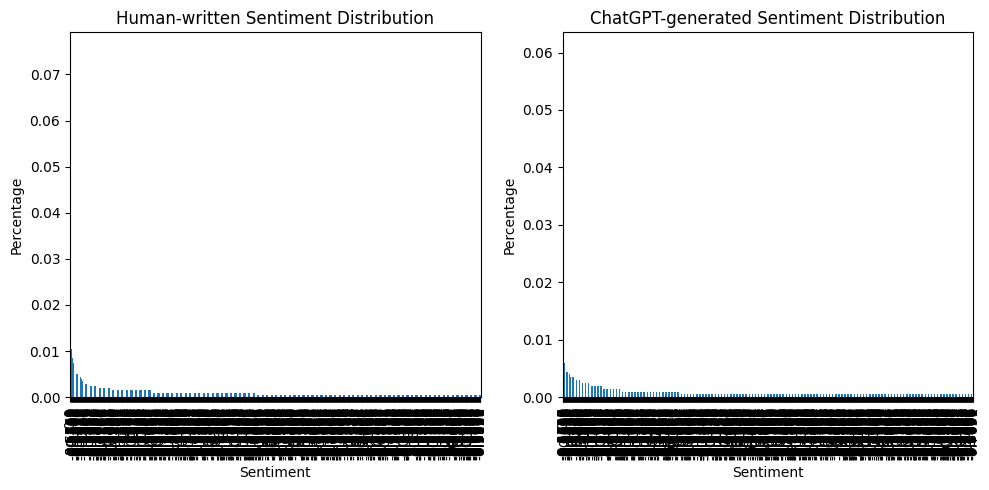

In [56]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load your labeled dataset
data = pd.read_csv('labeled-dataset.csv')

# Separate human-written and ChatGPT-generated reviews based on labels
human_reviews = data[data['label'] == 1]['text'].tolist()
chatgpt_reviews = data[data['label'] == 0]['text'].tolist()

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(reviews):
    sentiment_scores = []
    for review in reviews:
        sentiment_scores.append(sia.polarity_scores(review)['compound'])
    return sentiment_scores

# Get sentiment scores for each category
human_sentiments = get_sentiment_scores(human_reviews)
chatgpt_sentiments = get_sentiment_scores(chatgpt_reviews)

# Calculate sentiment distributions
human_sentiment_distribution = pd.Series(human_sentiments).value_counts(normalize=True)
chatgpt_sentiment_distribution = pd.Series(chatgpt_sentiments).value_counts(normalize=True)

# Output statements to display sentiment distributions
print("Sentiment Distribution for Human-written Reviews:")
print(human_sentiment_distribution)

print("\nSentiment Distribution for ChatGPT-generated Reviews:")
print(chatgpt_sentiment_distribution)

# Visualize sentiment distributions for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Human-written Sentiment Distribution')
human_sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
plt.title('ChatGPT-generated Sentiment Distribution')
chatgpt_sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


In [54]:
print("Sentiment Distribution for Human-written Reviews:")
print([human_sentiment_distribution])

print("\nSentiment Distribution for ChatGPT-generated Reviews:")
print(chatgpt_sentiment_distribution)


Sentiment Distribution for Human-written Reviews:


KeyError: 1

In [51]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fusion\AppData\Roaming\nltk_data...


True